# Issue frequency notebook

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
# %load imports.py
# Basic imports
import os
import sys

import matplotlib

sys.path.append('./')

# SQL database
import pymysql

# Classical external libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

# Import py files for generic functions
from sql import *
from helpers import *


In [4]:
import typing

## Connection to DB

In [5]:
# Connexion database
engine = db_engine()

## Load Useful Data

In [6]:
newspapers_df = read_table('impresso.newspapers', engine)
issues_df = read_table('impresso.issues', engine)

In [7]:
newspapers_languages_df = read_table('newspapers_languages', engine)
languages_df = read_table('languages', engine)
LANGUAGES = languages_df.code.unique()

In [8]:
newspapers_metadata_df = read_table('newspapers_metadata', engine)
meta_properties_df = read_table('meta_properties', engine)
PROPERTIES = meta_properties_df.name.unique()

## Number of newspaper issues by year/decade, filtered by provenance / language

In [9]:
# Create new decade column
issues_df['decade'] = issues_df.apply(lambda row: row.year-row.year%10, axis = 1) 

In [10]:
time_granularity = 'decade' # put 'year' to have statistics per year

# NP we are interested in : default is all use functions np_by_language / np_by_property to filter np
#newspapers_select = newspapers_df['id'].unique() #default : all
#newspapers_select = ['GDL', 'JDG', 'NZZ'] # for rapid visualization
newspapers_select = np_by_property(newspapers_metadata_df, meta_properties_df, 'countryCode', 'CH')

# Only keep the issues corresponding to the selected newspapers_id 
# NB: some newspapers have no issues so they will simply be discarded
issues_df_select = filter_df_by_np_id(issues_df, newspapers_select)
np_ids = issues_df_select.newspaper_id.unique()
print("Based on the selected property, we have {} newspapers left.".format(len(np_ids)))

grouping_columns = ['newspaper_id', time_granularity]

nb_issue_per_np_time_id, _, _ = group_and_count(issues_df_select, grouping_columns, 'id', print_=False)

Based on the selected property, we have 18 newspapers left.


Column last_modified is often NaT, which is why the count is not the same. For that others we always have the same number so we can take any column (and we take 'id').

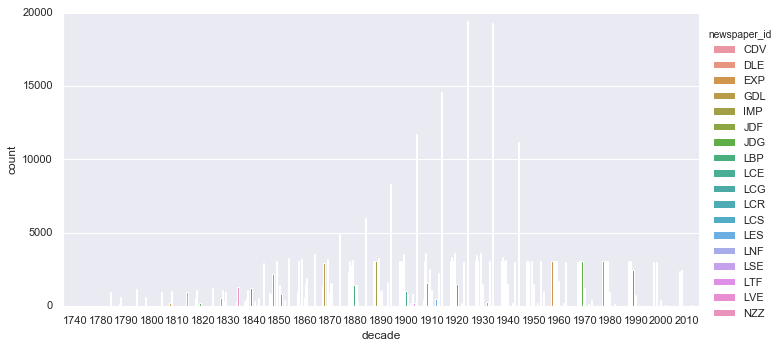

In [11]:
sns.catplot(x=time_granularity, y="count", hue="newspaper_id", kind="bar", \
            data=nb_issue_per_np_time_id, height=5, aspect=2);

##### Luxembourg

In [12]:
newspapers_select_lux = np_by_property(newspapers_metadata_df, meta_properties_df, 'countryCode', 'LU')
issues_df_select_lux = filter_df_by_np_id(issues_df, newspapers_select_lux)
np_ids_lux = issues_df_select_lux.newspaper_id.unique()
print("Based on the selected property, we have {} newspapers left.".format(len(np_ids_lux)))

grouping_columns = ['newspaper_id', time_granularity]

nb_issue_per_np_time_id_lux, _, _ = group_and_count(issues_df_select_lux, grouping_columns, 'id', print_=False)

Based on the selected property, we have 25 newspapers left.


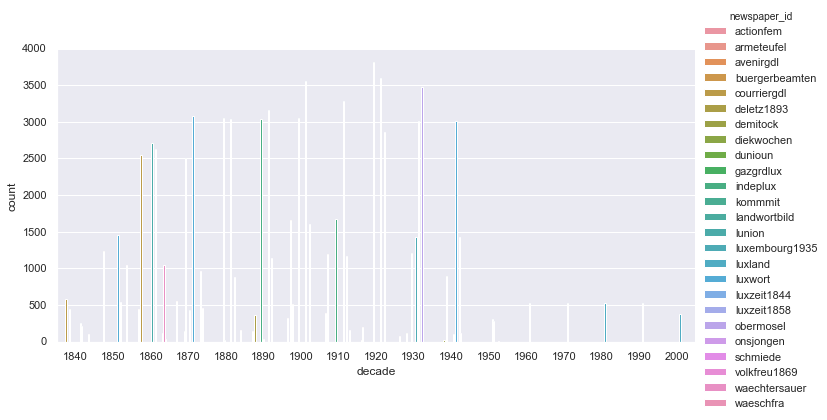

In [13]:
sns.catplot(x=time_granularity, y="count", hue="newspaper_id", kind="bar", \
            data=nb_issue_per_np_time_id_lux, height=5, aspect=2);

#### Plot by batch to see better

In [14]:
# TODO : put this into a py file (plot.py ?)
# Limit the number of categories represented on each plot
def catplot_by_batch_np(df, np_list=np_ids, max_cat = 5):
    
    if len(df.newspaper_id.unique()) > max_cat :
        np_batch = [np_list[x:x+max_cat] for x in range(0, len(np_list), max_cat)]
        
    # Plot by batches
    for i, b in enumerate(np_batch) :  
        batch = filter_df_by_np_id(df, b)
        sns.catplot(x=time_granularity, y="count", hue="newspaper_id", kind="bar", \
                    data=batch, height=5, aspect=2);

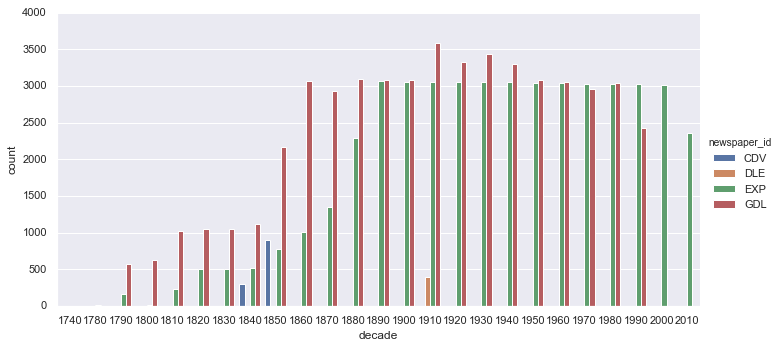

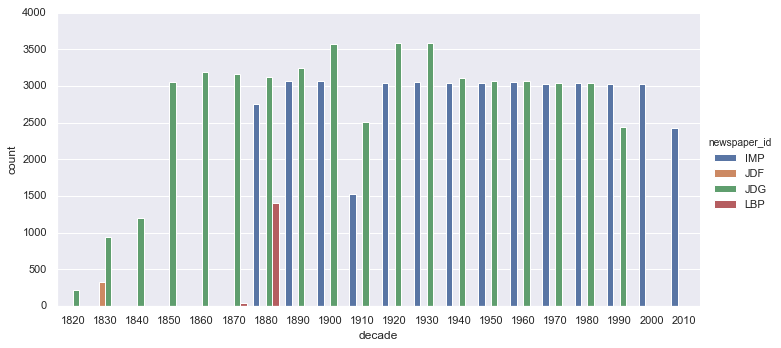

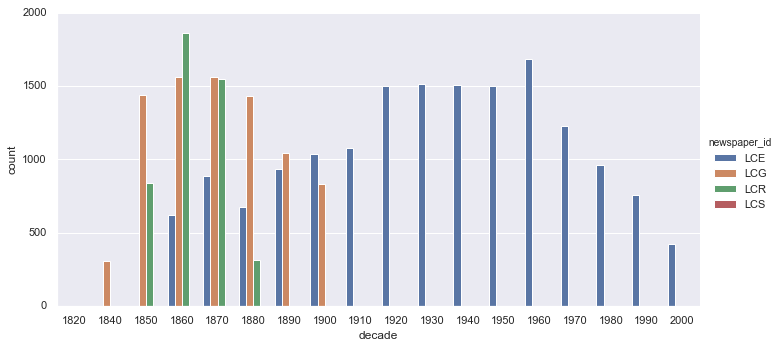

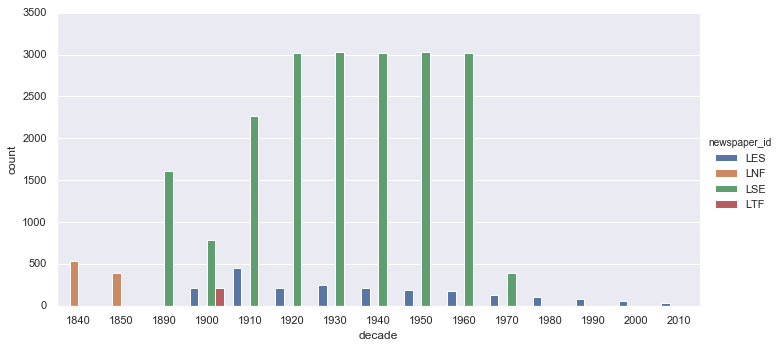

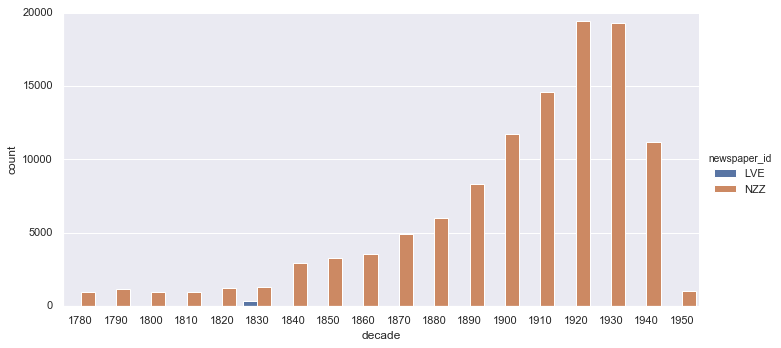

In [15]:
catplot_by_batch_np(nb_issue_per_np_time_id, np_ids, 4)

#### Make more intelligent plot groups

In [16]:
# Idea : reorder the np_ids list based on 
# - the number of decades for which the newspaper is represented
# - TODO : try other orders

In [17]:
# get np ids ordered by spread in time (nb of decades in which they are represented)
np_ids_by_spread_in_time = nb_issue_per_np_time_id.newspaper_id.value_counts().index

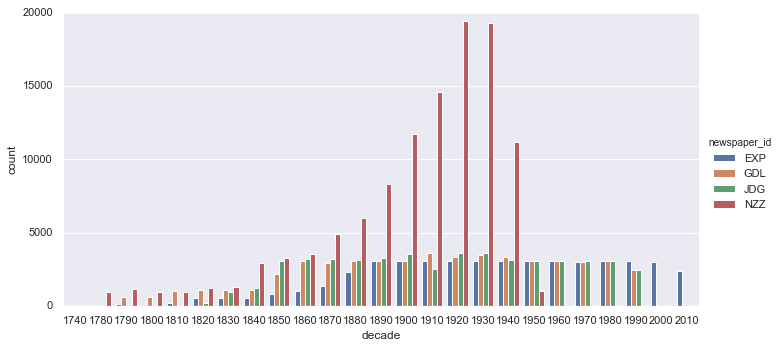

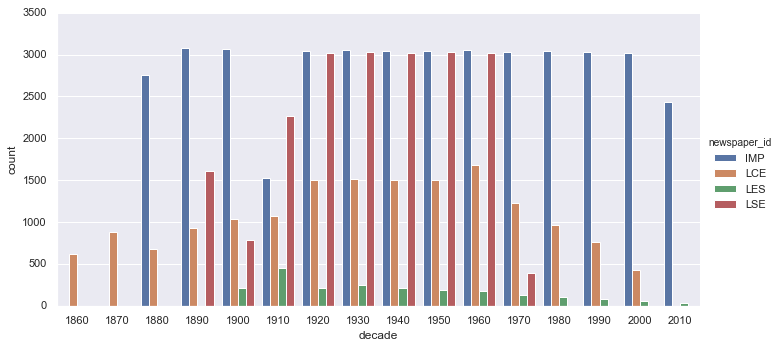

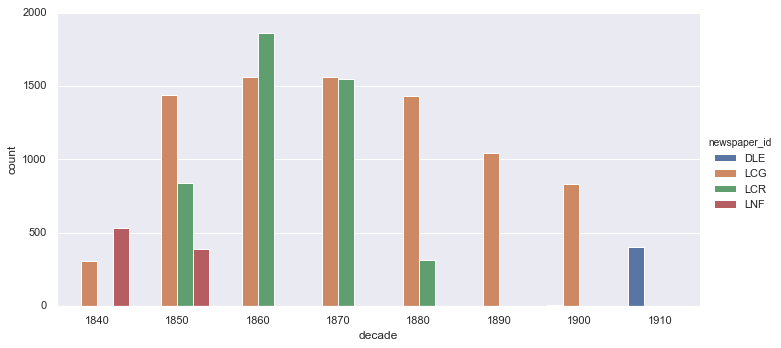

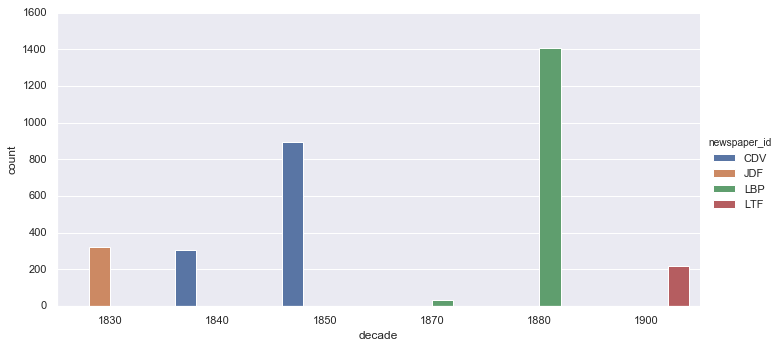

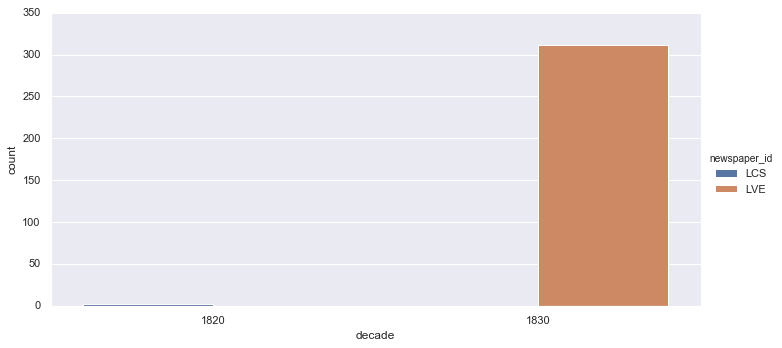

In [18]:
catplot_by_batch_np(nb_issue_per_np_time_id, np_ids_by_spread_in_time, 4)